In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy import optimize
%matplotlib inline

In [14]:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [15]:
tem_Max=np.array(Max)
tem_Min=np.array(Min)

In [16]:
month=np.array(range(1,13))
month

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0.5, 0, 'Month')

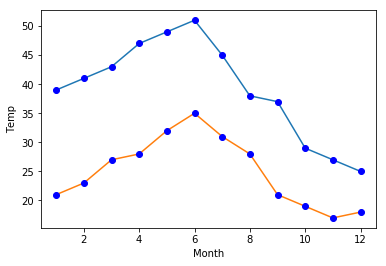

In [17]:
plot.plot(month,tem_Max)
plot.plot(month,tem_Max,'bo')
plot.plot(month,tem_Min)
plot.plot(month,tem_Min,'bo')
plot.ylabel("Temp")
plot.xlabel("Month")

In [18]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,tem_Max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,tem_Min, [-40, 20, 0])


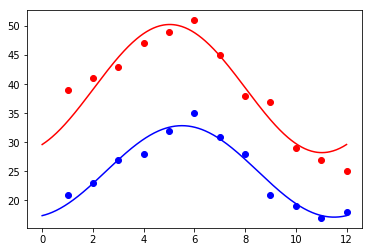

In [23]:
days = np.linspace(0, 12, num=365)

plot.figure()
plot.plot(month, tem_Max, 'ro')

plot.plot(days, yearly_temps(days, *res_max), 'r-')

plot.plot(month, tem_Min, 'bo')

plot.plot(days, yearly_temps(days, *res_min), 'b-')

#plot.legend()

plot.show()

In [26]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [29]:
titanic=pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [62]:
titanic.max()

pclass        3.0000
survived      1.0000
age          80.0000
sibsp         8.0000
parch         9.0000
fare        512.3292
body        328.0000
dtype: float64

In [57]:
df=titanic.groupby(['sex']).count()['survived']
df

sex
female    466
male      843
Name: survived, dtype: int64

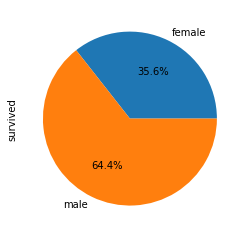

In [58]:
df.plot.pie(y=df,autopct='%1.1f%%')

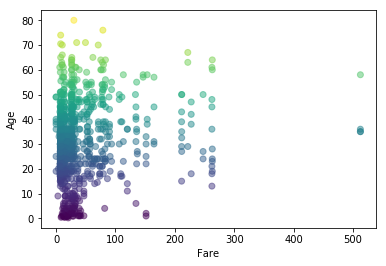

In [64]:
plot.scatter(x=titanic['fare'],y=titanic['age'],alpha=0.5,c=titanic['age'])
plot.xlabel('Fare')
plot.ylabel('Age')
plot.show()